Instructions to Run

Cell -> Run All

# Decision Tree

This notebook implements one of the methods we applied: Decision Tree <br> <br>
Decision tree is a supervised learning method used for classification. It is used to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. The library considered for the implementation is from sklearn

NoteBook Contents:
1. Importing required libraries
2. Reading Input file and checking frequency of openings
3. Replacing Categorical values with numbers as Decision Tree cannot handle Categorical values
3. Building Decision Tree model For an Opening and Elo ratings of Players (For various depth, test size =0.2)
5. Using K-Fold cross validation(10 splits, depth of DT:14)
6. Finding Accuracy, Plotting Tree

### Building Decision Tree model For an Opening and Elo ratings of Players

Here we consider 3 columns of dataframe as Features - Opening, White Elo Rating, Black Elo Rating
The target column is Game Result

We build the decisions for various depth, with 80% of data as training and 20% as test data.

### Importing required libraries

In [61]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
import matplotlib.pyplot as plt
import sklearn
import seaborn
import time
from sklearn.model_selection import KFold, GridSearchCV

### Reading the input file

In [16]:
df = pd.read_csv('data/output/output.csv')
print(len(df))

83483


### Checking count of each opening

In [17]:
print(df['Opening'].value_counts())

sicilian_rossolimo        25710
GiuocoPiano               15296
Nimzowitsch-Larsen        10163
four_knights              10066
caro_kann_classic          9616
Caro-Kann2c4               4403
Kings_Gamit                4277
sicilian_dragon_other6     1752
qid4e3                     1596
Modern                      604
Name: Opening, dtype: int64


### Replacing Opening and game result with numerical values as Decision Tree cannot handle Categorical values

In [18]:
df.replace({'Opening': {'sicilian_rossolimo':1, 'caro_kann_classic':2, 'sicilian_dragon_other6':3, 'four_knights':4, 'qid4e3':5,
                        'GiuocoPiano': 6,'Nimzowitsch-Larsen':7, 'Caro-Kann2c4': 9, 'Kings_Gamit':10, 'Modern':11}}, inplace=True)


df.replace({'game_result': {'draw':0, 'white':1, 'black':2}}, inplace=True)

### Decision Tree Based on Opening, WhiteElo and BlackElo

#### Splitting the data into train and test

In [19]:
def prep_training(df, first_n_moves):
    
    x = df[['WhiteElo', 'BlackElo', 'Opening']]
    y = df.iloc[:, 10]
   
    return sklearn.model_selection.train_test_split(x, y, test_size=0.2)

In [20]:
x_train, x_test, y_train, y_test = prep_training(df, 4)

### Building decision tree
##### Finding accuracy 

In [64]:
def build_decision_tree(x_train,y_train, x_test, y_test):
    
    params = {'max_depth': [2,4,6,8,10,12,14],
         'min_samples_split': [2,3,4,5,6,8,10,15],
         'min_samples_leaf': [1,2,3,4,5,7,10]}

    clf = tree.DecisionTreeClassifier()
    dClassifier = GridSearchCV(estimator=clf,param_grid=params)
    dClassifier.fit(x_train,y_train)
    
    model = dClassifier.best_estimator_
    model.fit(x_train,y_train)

#     #  1. create a model
#     clf = DecisionTreeClassifier(max_depth =depth, min_samples_splitint=4, min_samples_leaf=2) #max_depth = depth

#     #  2. feed training data into the model
#     clf = clf.fit(x_train,y_train)

    #  3. predict values for your test data
    y_pred = model.predict(x_test)
    
    #class_n = ['result']
    plt.figure(figsize=(12,12))  # set plot size
    class_n = ['draw', 'white', 'black']
    features = ['WhiteElo', 'BlackElo', 'Opening']
    tree.plot_tree(model, filled = True, fontsize=10,rounded=True,class_names=class_n, feature_names=features);
    plt.show()

    #  5. find the training and testing accuracy
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred,average=None))
    print("Recall:", metrics.recall_score(y_test, y_pred, average=None))
    cf = metrics.confusion_matrix(y_test, y_pred)
    seaborn.heatmap(cf,annot=True,yticklabels=class_n
               ,xticklabels=class_n,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
          

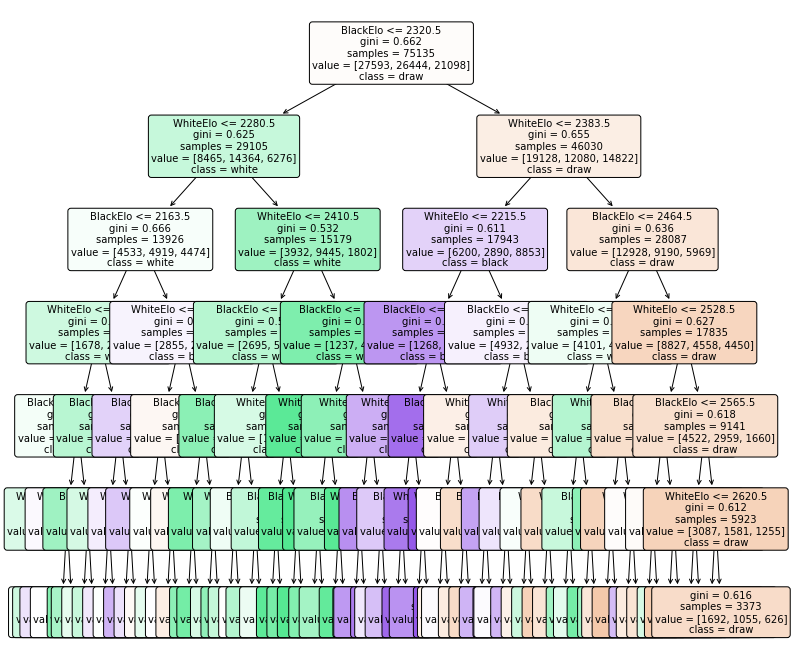

Accuracy: 0.5235984666986104
Precision: [0.38101213 0.57944758 0.58262548]
Recall: [0.35351184 0.64177632 0.55254486]


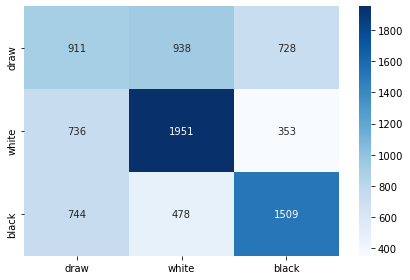


Time:
107.1053192615509


In [65]:

start = time.time()
build_decision_tree(x_train,y_train, x_test, y_test)
end = time.time()
print('\nTime:')
print(end - start)

### Using K-Fold cross validation

We are using K-fold cross validation to evaluate Model's performance for various train/test dataset

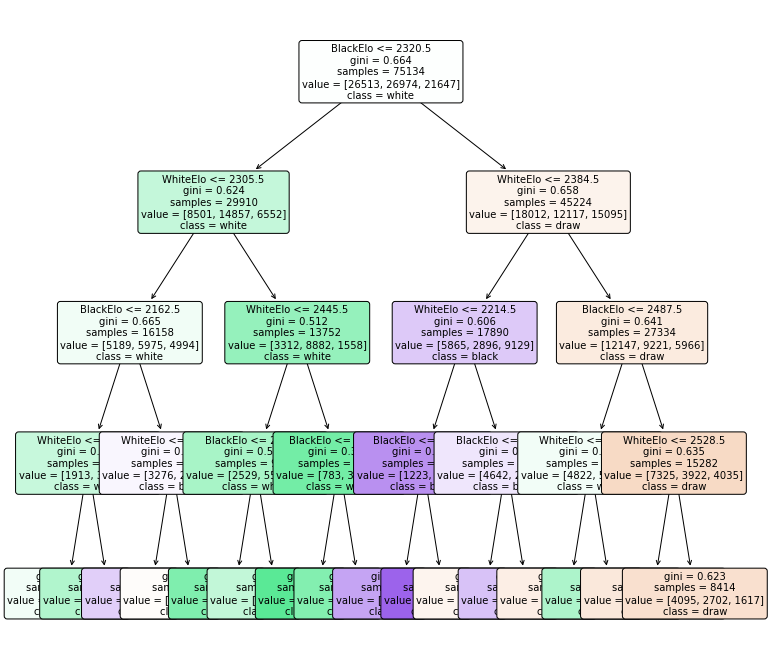

Accuracy: 0.5153910647981794
Precision: [0.52009744 0.53031597 0.48685594]
Recall: [0.58381187 0.49482072 0.4243813 ]
Confusion metrix: [[2135  796  726]
 [1018 1242  250]
 [ 952  304  926]]


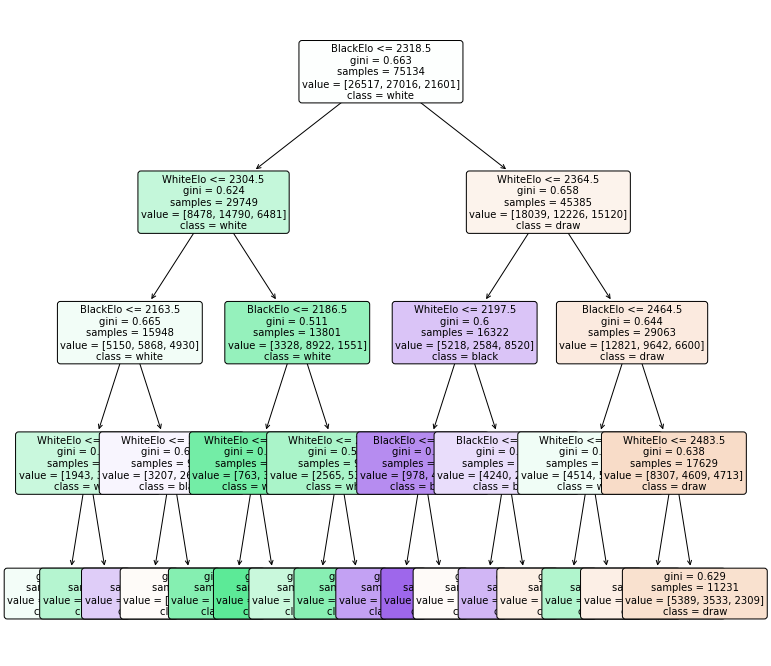

Accuracy: 0.5271289974847287
Precision: [0.52573612 0.54061372 0.51306413]
Recall: [0.64029565 0.48541329 0.38779174]
Confusion metrix: [[2339  716  598]
 [1048 1198  222]
 [1062  302  864]]


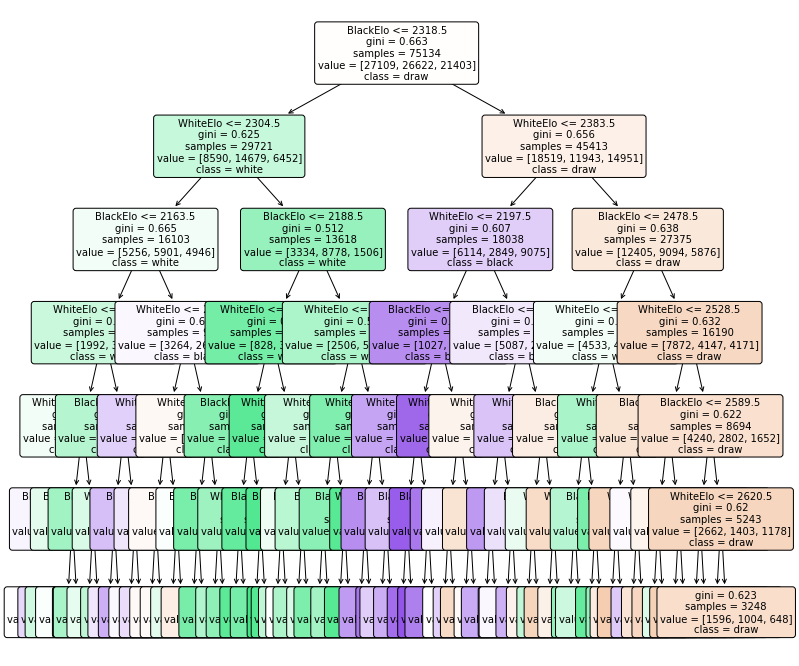

Accuracy: 0.4962270930650377
Precision: [0.43452226 0.55705432 0.53597734]
Recall: [0.54524665 0.53389238 0.38994229]
Confusion metrix: [[1669  830  562]
 [1077 1528  257]
 [1095  385  946]]


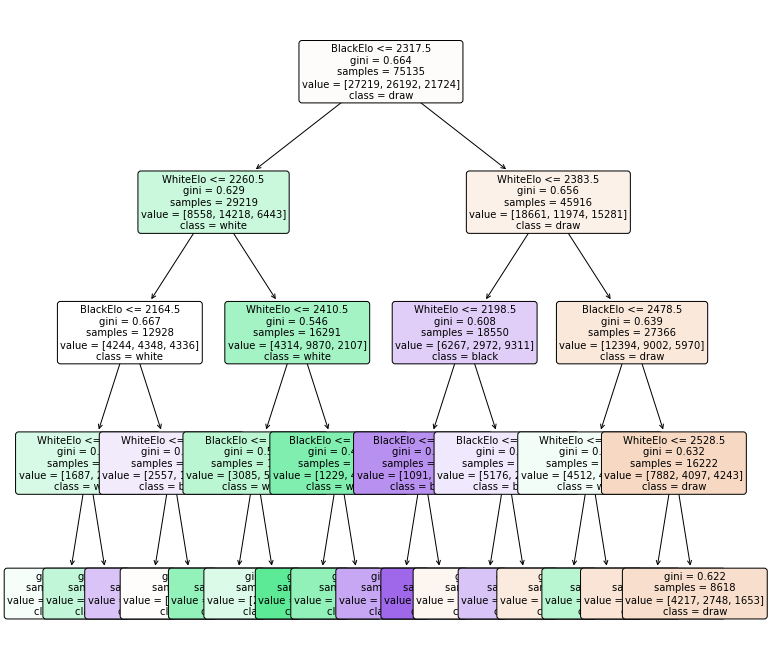

Accuracy: 0.5257546717776713
Precision: [0.44214772 0.60918463 0.58050847]
Recall: [0.59437479 0.59234508 0.32541568]
Confusion metrix: [[1754  855  342]
 [1189 1950  153]
 [1024  396  685]]


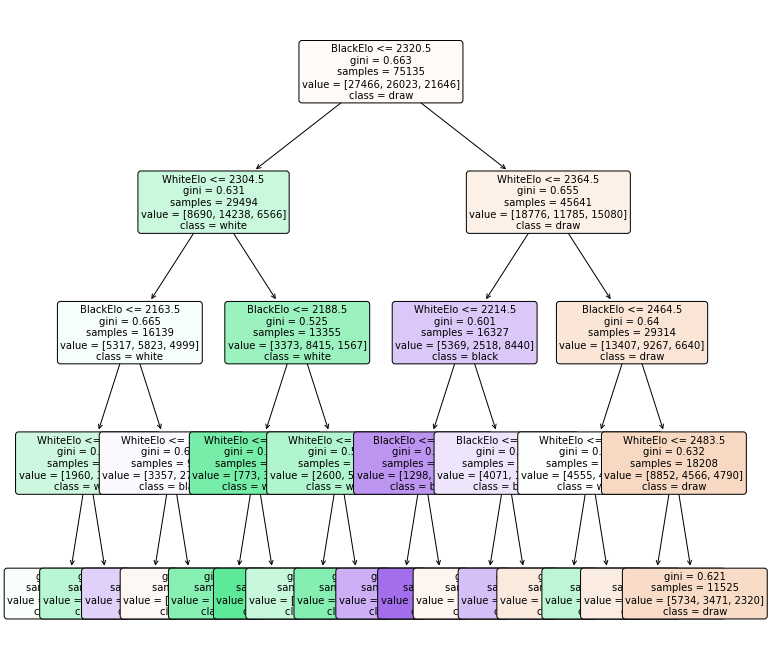

Accuracy: 0.5426449448969813
Precision: [0.42161383 0.65864066 0.56731371]
Recall: [0.5410503  0.62438602 0.41502519]
Confusion metrix: [[1463  779  462]
 [1071 2161  229]
 [ 936  341  906]]


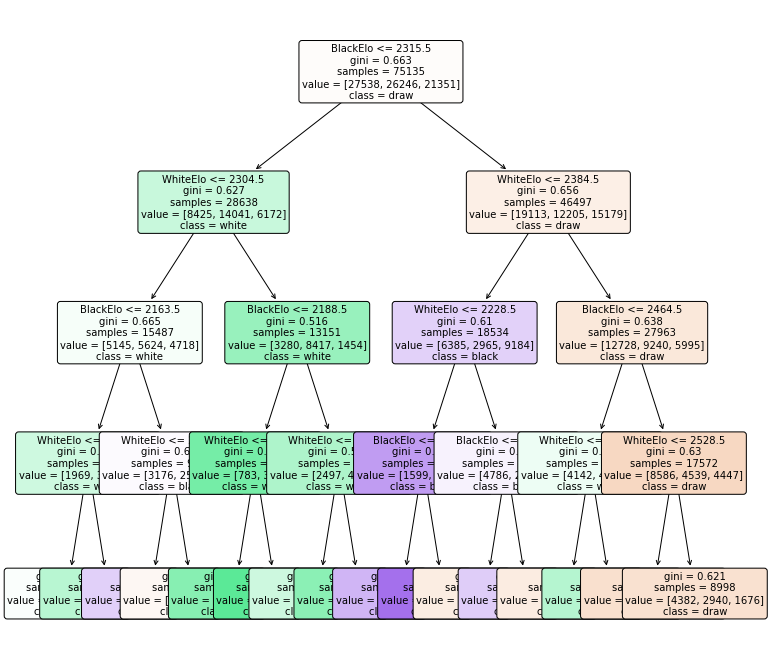

Accuracy: 0.507546717776713
Precision: [0.3909465  0.61517336 0.5698324 ]
Recall: [0.54141337 0.55342804 0.41162228]
Confusion metrix: [[1425  706  501]
 [1177 1792  269]
 [1043  415 1020]]


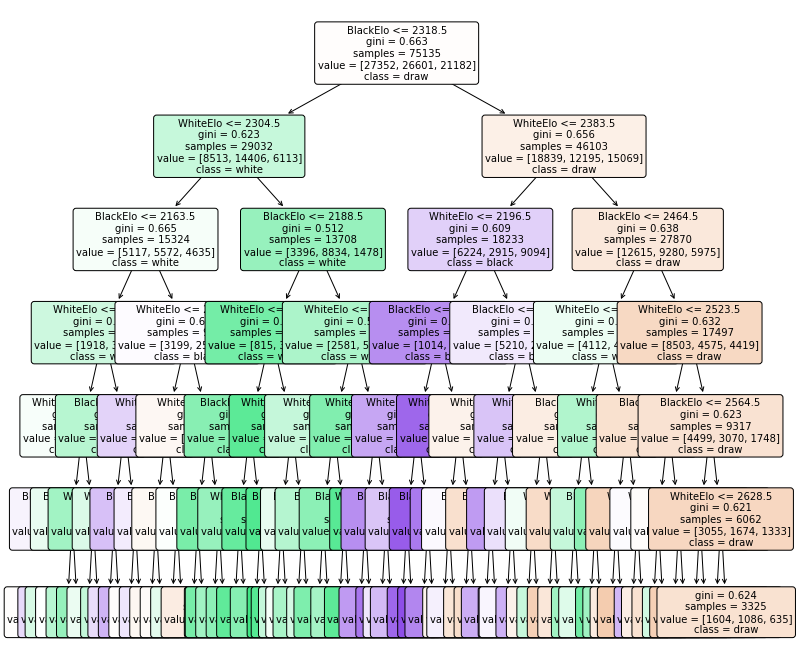

Accuracy: 0.5067081935793004
Precision: [0.42685026 0.57006952 0.55612964]
Recall: [0.52803407 0.5404093  0.44729883]
Confusion metrix: [[1488  721  609]
 [ 989 1558  336]
 [1009  454 1184]]


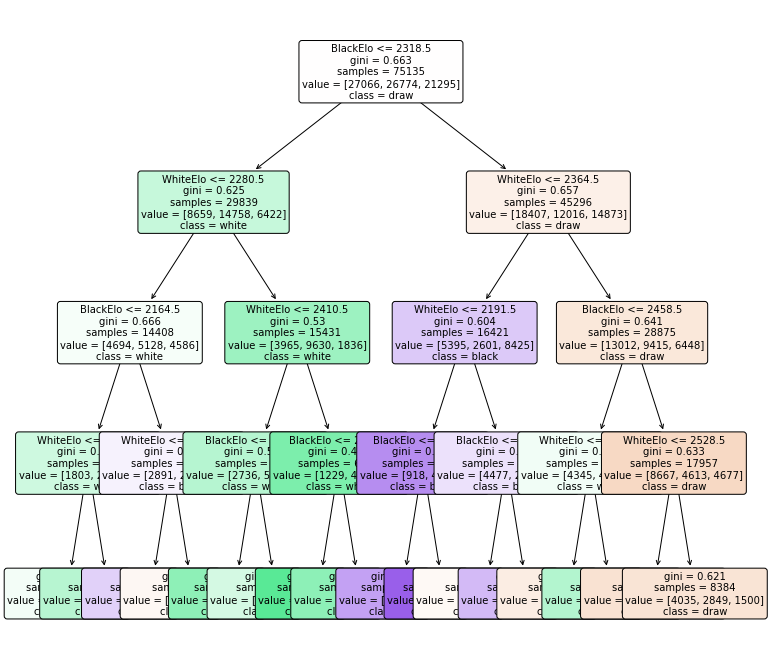

Accuracy: 0.5177287973167226
Precision: [0.45859413 0.55898437 0.60342717]
Recall: [0.61372423 0.52804428 0.38910813]
Confusion metrix: [[1905  736  463]
 [1094 1431  185]
 [1155  393  986]]


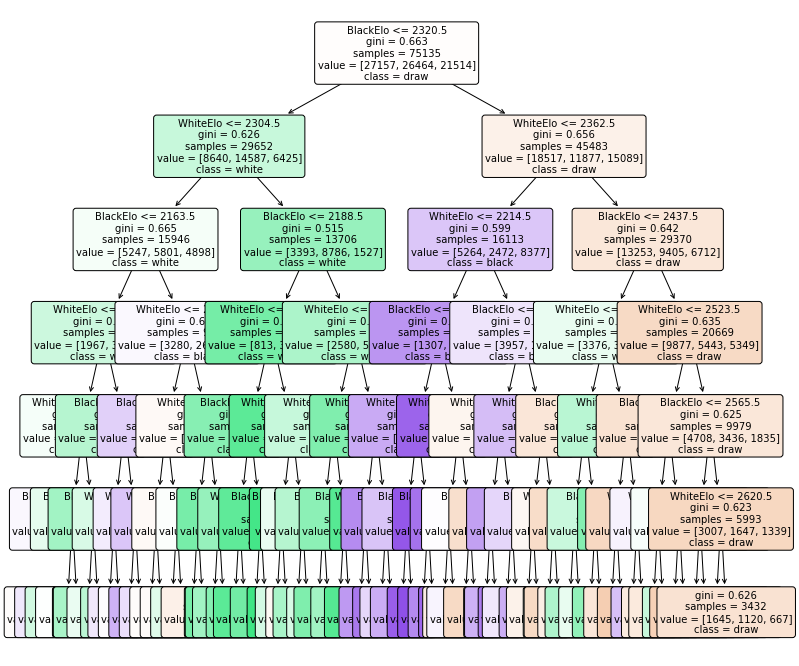

Accuracy: 0.5109008145663632
Precision: [0.45778612 0.5677462  0.50988701]
Recall: [0.48589446 0.56887417 0.46781857]
Confusion metrix: [[1464  884  665]
 [ 926 1718  376]
 [ 808  424 1083]]


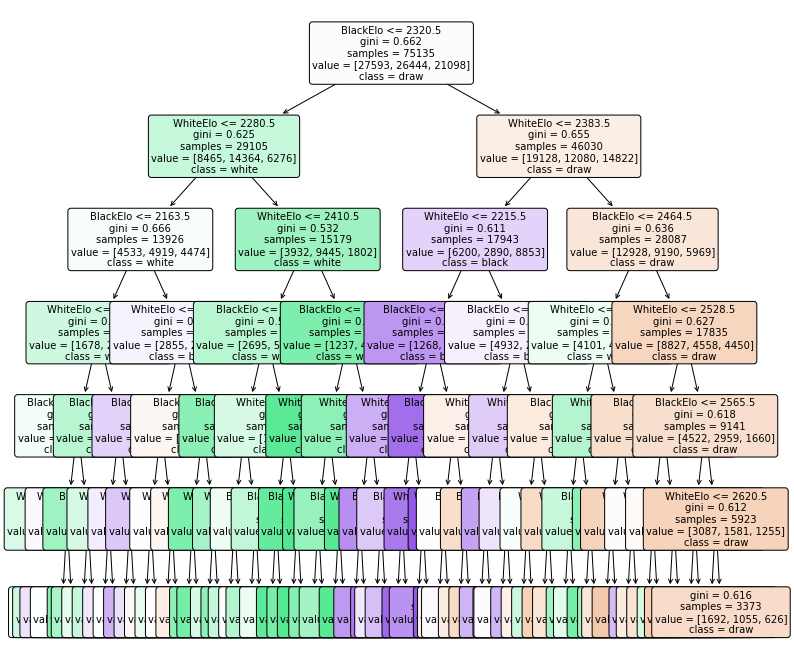

Accuracy: 0.5235984666986104
Precision: [0.38101213 0.57944758 0.58262548]
Recall: [0.35351184 0.64177632 0.55254486]
Confusion metrix: [[ 911  938  728]
 [ 736 1951  353]
 [ 744  478 1509]]


In [58]:
x = df[['WhiteElo', 'BlackElo', 'Opening']]
y = df.iloc[:, 10]

x = x.to_numpy()
y =y.to_numpy()

kf = KFold(n_splits=10, random_state=None)
#kf.get_n_splits(x)

for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    build_decision_tree( x_train,y_train, x_test, y_test)